In [1]:
# Import library
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Section 1 - Plotting and calculation accelerometer rho angle

# Import dataset
df = pd.read_excel('Acceleration.xls')
print(df)

df['Ax'] = df['x']-sum(df['x'])/df['x'].count()
df['Ay'] = df['y']-sum(df['y'])/df['y'].count()
df['Az'] = df['z']-sum(df['z'])/df['z'].count()

        Time (s)         x         y         z  Absolute acceleration (m/s^2)
0       0.107483 -0.029362  0.061286 -0.126186                       0.143322
1       0.112461 -0.023239  0.058102 -0.096515                       0.115026
2       0.117450 -0.035597  0.052994 -0.068706                       0.093787
3       0.122456 -0.024858  0.041243 -0.058440                       0.075724
4       0.127473 -0.028323  0.029933 -0.057974                       0.071128
...          ...       ...       ...       ...                            ...
11945  59.983437 -0.002734 -0.072734  0.079426                       0.107732
11946  59.988450 -0.004960 -0.078976  0.071668                       0.106761
11947  59.993463  0.018914 -0.080692  0.066319                       0.106146
11948  59.998476  0.018969 -0.058818  0.070492                       0.093747
11949  60.003488  0.030849 -0.077764  0.053221                       0.099153

[11950 rows x 5 columns]


In [3]:
# Define accelerometer rho angle computation function
# With formula :
# Arctan(Ax / sqrt(Ay^2 + Az^2))
rho_angle_func = lambda Ax,Ay,Az: math.atan(Ax/ math.sqrt(math.pow(Ay, 2) + math.pow(Az, 2)))

In [4]:
# Perform calculation with map and functional way
accelerometer_rho_angle = list(map(rho_angle_func, df['Ax'].to_numpy(), 
                                                   df['Ay'].to_numpy(), 
                                                   df['Az'].to_numpy()))

In [5]:
# Define function to mapping plot filename
map_plot_filename = lambda filename: '_'.join(list(map(str.lower, filename.split(' '))))

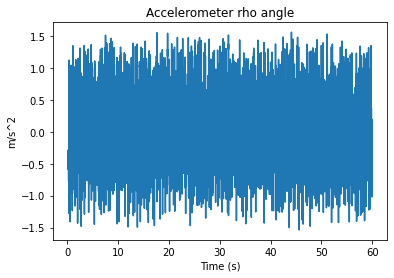

In [6]:
# Plotting knee flexion based on time
plot_name = 'Accelerometer rho angle'
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.title(plot_name)
plt.plot(df['Time (s)'].to_numpy(), accelerometer_rho_angle)
plt.savefig(map_plot_filename(plot_name))
plt.show()

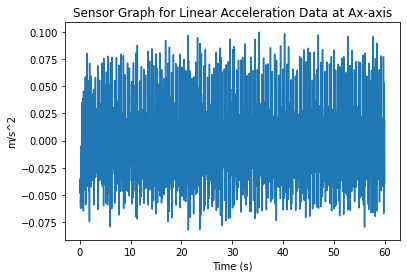

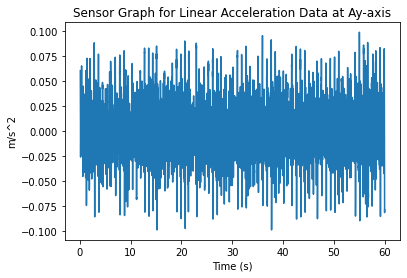

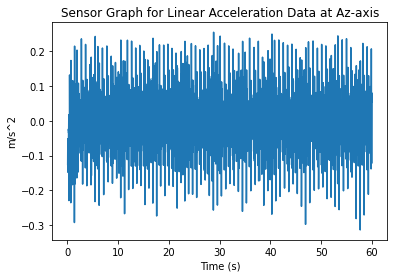

In [7]:
# Section 2 - Plotting accelerometer signal
data = ['Ax', 'Ay', 'Az']
for i in range(3):
    plot_name = f'Sensor Graph for Linear Acceleration Data at {data[i]}-axis'
    plt.xlabel('Time (s)')
    plt.ylabel('m/s^2')
    plt.title(plot_name)
    plt.plot(df['Time (s)'].to_numpy(), df[data[i]].to_numpy())    
    plt.savefig(map_plot_filename(plot_name))
    plt.show()    